In [1]:
from nltk.book import *
%matplotlib inline

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
#search

# search times
text1.concordance("wrong")
#search similar
text1.similar("wrong")

# search context use two or more word 
text2.common_contexts(["monstrous","very"])

# show location of word
text4.dispersion_plot(["citizens","democracy","freedom","duties","Ameica"])

# 固定搭配
text4.collocations()

Displaying 8 of 8 matches:
, on the mere suspicion of something wrong , had been arrested ere he touched a
d one . So good - bye to thee -- and wrong not Captain Ahab , because he happen
en sea . But when a man suspects any wrong , it sometimes happens that if he be
that old man has a sort of turned me wrong side out . By the Lord , I must have
oving such pictures of the whale all wrong . It may be that the primal source o
yet that small section of him is all wrong . It looks more like the tapering ta
et something better . I hope I do no wrong , Mr . Starbuck . It is the captain 
ribly conscious of something fatally wrong . The jaw - bone tiller smote my sid
in now take what this for more could as would go about were did round
creation though do time hands
am_glad a_pretty a_lucky is_pretty be_glad


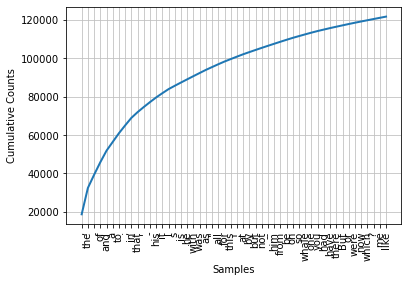

In [11]:
# a dictionary :word as key ,frequency as value
fdist1=FreqDist(text1)


# cumulative counts of the words in top 50 
fdist1.plot(50,cumulative=True)

# frequence of diffrenent length word
fdist=FreqDist([len(w) for w in text1])
fdist.plot()

# conditinal frequence
from nltk.corpus import brown
#(condition,word) 条件还是自己写 （c，w）格式用于统计绘图
cfd=nltk.ConditionalFreqDist((genere,word)  
                            for genere in ["news","romance"]
                            for word in brown.words(categories=genere))
# cfd.plot() 
cfd.tabulate(conditions=["news"],samples=["word"]) 


In [15]:
import nltk
# book resource 
nltk.corpus.gutenberg.fileids()#query for filename

nltk.corpus.reuters.categories() #query for categories
# words list
emma=nltk.corpus.gutenberg.words("austen-emma.txt")
# char list
nltk.corpus.gutenberg.raw("austen-emma.txt")

#sentence list
nltk.corpus.gutenberg.sents("austen-emma.txt")



['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [35]:
# import yours text resource
from nltk.corpus import PlaintextCorpusReader
corpus_root=r"C:\Users\Lenovo\Desktop\gittest" #r 代表禁止转义
wordlists=PlaintextCorpusReader(corpus_root,".*") #文件地址 与正则表达式
wordlists.fileids()

In [37]:
# random generate text
def generate_model(cfdist,word,num=15):
    for i in range(num):
        print(word)
        word=cfdist[word].max()
text=nltk.corpus.genesis.words("english-kjv.txt")
bigrams=nltk.bigrams(text)
cfd=nltk.ConditionalFreqDist(bigrams)

generate_model(cfd,"living")

living
creature
that
he
said
,
and
the
land
of
the
land
of
the
land


In [54]:
# wordnet synet:同义词集合 lemma：同义词
from nltk.corpus import wordnet as wn
wn.synsets("motorcar")
wn.synset("car.n.01").lemma_names()
wn.lemmas("car")

# lemma 访问同义词 
wn.lemma("car.n.01.automobile")
wn.lemma("car.n.01.automobile").synset()
wn.lemma("car.n.01.automobile").name()



[Lemma('car.n.01.car'),
 Lemma('car.n.02.car'),
 Lemma('car.n.03.car'),
 Lemma('car.n.04.car'),
 Lemma('cable_car.n.01.car')]

In [74]:
# read books from network or others
from urllib.request import urlopen
url="https://www.gutenberg.org/files/2554/2554-0.txt"
proxies={"http":"http://someproxy.com:3128"}
raw=urlopen(url).read()

# decode :bytes to str 
tokens=nltk.word_tokenize(raw.decode("utf-8"))
# turn to nltk.text
text=nltk.Text(tokens)
text.concordance("anybody")

raw=raw.decode("utf-8")
raw.find("PART I")
# index of the last one
raw.find("End of Project Gutenberg’s Crime and Punishment")

In [90]:
# read html
from bs4 import BeautifulSoup
url="https://www.runoob.com/python/att-string-rfind.html"
html=urlopen(url).read()

raw=BeautifulSoup(html).get_text()
tokens=nltk.word_tokenize(raw)

In [104]:
path=nltk.data.find("corpora/unicode_samples.polish-lat2.txt")
import codecs
f=codecs.open(path,encoding="latin2")

LookupError: 
**********************************************************************
  Resource [93municode_samples.polish-lat2.txt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('unicode_samples.polish-lat2.txt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/unicode_samples.polish-lat2.txt[0m

  Searched in:
    - 'C:\\Users\\Lenovo/nltk_data'
    - 'D:\\anaconda\\envs\\python36\\nltk_data'
    - 'D:\\anaconda\\envs\\python36\\share\\nltk_data'
    - 'D:\\anaconda\\envs\\python36\\lib\\nltk_data'
    - 'C:\\Users\\Lenovo\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [118]:
# encode and decode 
path=r"C:\Users\Lenovo\Desktop\text1.txt"
import codecs
f=codecs.open(path,encoding="utf-8") #指定以什么编码方式读入
for line in f: 
    line=line.strip()
    print(line.encode("utf-8"))  #指定以何种方式进行编码

b'\xe6\x88\x91\xe7\x9a\x84\xe6\xaf\x8f\xe4\xb8\x80\xe5\xa4\xa9'
b'\xe9\x83\xbd\xe6\x98\xaf'
b'\xe9\x83\xbd\xe6\x98\xaf'
b'\xe6\x97\xa0\xe6\x84\x8f\xe4\xb9\x89\xe7\x9a\x84'


In [131]:
import re 
wordlist=[w for w in nltk.corpus.words.words("en") if w.islower()]
patten1="ed$"
[w for w in wordlist if re.search(patten1,w)]
patten2="^..j..t..$"
[w for w in wordlist if re.search(patten2,w)]

patten3="^sing?"
[w for w in wordlist if re.search(patten3,w)]

# [] set / ^ in [] means ! 
patten4="^[ghi][mno][jlk][def]$"
[w for w in wordlist if re.search(patten4,w)]
# + repeat of the char in front of "+" >1
#*repeat of the char in front of "*" >0
patten5="^gram+"
[w for w in wordlist if re.search(patten5,w)]


In [151]:
wsj=sorted(set(nltk.corpus.treebank.words()))
[w for w in wsj if re.search("^[0-9]+\.[0-9]+$",w)]
# {num1,num2} num1~num2 repeate time 
#{num} num repeate time
[w for w in wsj if re.search("^[0-9]{4}$",w)]

# 操作符范围
b=[w for w in wsj if re.search("(ed|ing)$",w)]

# 禁止python解释器 解释字符串  但不妨碍re理解如/.
r"\band\b"
"\band\b"

#findall
fd=nltk.FreqDist(vs for w in wsj for vs in re.findall(r"[aeiou]{2,}",w))
fd.items()

In [155]:
rotokas_words=nltk.corpus.toolbox.words("rotokas.dic")
cvs=[cv for w in rotokas_words for cv in re.findall(r"[ptksvr][aeiou]",w)]
# "ab" ab生成条件
cfd=nltk.ConditionalFreqDist(cvs)
cfd.tabulate()

re.findall(r"^.*(ing|ly|ed)$","processing")
#括号会默认提取子字符串 
re.findall(r"^.*(?:ing|ly|ed)$","processing")
#提取两部分 返回为（）形式
re.findall(r"^(.*)(ing|ly|ed)$","processing")

#对文本中单词进行匹配
a=["processing ","started"]
text=nltk.Text(a)
text.findall(r"<.*> <started>")
# 标记匹配部分
nltk.re_show(r"(ing|ly|ed)$","abc processing"
             
#词干提取
proter=nltk.PorterStemmer()
[porter.stem(t) for t in wordlist]

In [ ]:
#分词

#\W匹配所有非字母、非数字、非下划线 \s匹配空白字符
re.split(r"\W+",raw)
re.findall(r"\w+|\S\w*")

#分词器
text="That U.S.A. poster-print costs $12.40..."
pattern=regexp_tokenize(patten,text)

# 分句器
from nltk.tokenize import sent_tokenize
sent_tokenizer=nltk.data.load("tokenizers/punkt/english.pickle")

text=nltk.corpus.gutenberg.raw("chesterton-thursday.txt")
sents=sent_tokenizer.tokenize(text)
